In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.special import inv_boxcox

params = pd.read_csv('../../../v1_1/data/RIbench/BMTestSets_meta.csv')
params = params[(params.Analyte!='CRP') & (params.Analyte!='LDH')]



In [2]:
ribench_targets = []
new_targets = []
for i in params.iterrows():
    
    ribench_targets.append([i[1]['GT_LRL'], i[1]['GT_URL']])
    
    target = norm(loc=i[1]['nonp_mu'], scale=i[1]['nonp_sigma'])
    target = np.array([target.ppf(0.025), target.ppf(0.975)])
    target = inv_boxcox(target, i[1]['nonp_lambda'])
    
    new_targets.append(target)
    
del target
ribench_targets = np.array(ribench_targets)
new_targets = np.array(new_targets)
    

In [3]:
errors = np.abs(ribench_targets-new_targets).flatten()


In [4]:
errors.max()


0.000900040799516777

In [5]:
params = pd.read_csv('../../../v1_1/data/RIbench/BMTestSets_meta.csv', index_col=0)
params = params[params.Analyte=='CRP']


In [6]:
ribench_targets = []
new_targets = []
for i in params.iterrows():
    
    ribench_targets.append(i[1]['GT_URL'])
    
    target = norm(loc=i[1]['nonp_mu'], scale=i[1]['nonp_sigma'])
    target = np.array(target.ppf(0.975))
    target = inv_boxcox(target, i[1]['nonp_lambda'])
    
    new_targets.append(target)
    
del target
ribench_targets = np.array(ribench_targets)
new_targets = np.array(new_targets)
    

Matplotlib is building the font cache; this may take a moment.


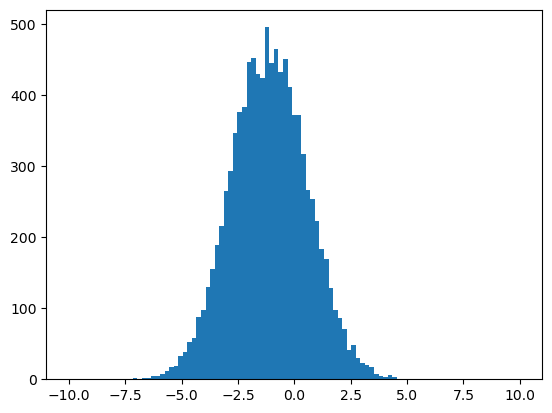

In [7]:
import matplotlib.pyplot as plt
sample = np.random.normal(i[1]['nonp_mu'], i[1]['nonp_sigma'], 10000)
plt.hist(sample, np.linspace(-10, 10, 100));
